# Manufacturing Stock Analysis

### GRINDWELL.NS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Download the data

In [2]:
grin = yf.download("GRINDWELL.NS", start="2019-01-01", end="2023-12-30")
grin.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,559.849976,565.450012,555.799988,559.250000,520.957153,10666
2019-01-02,558.650024,558.700012,552.950012,554.349976,516.392578,6398
2019-01-03,559.799988,559.849976,552.950012,554.000000,516.066528,2439
2019-01-04,555.150024,569.000000,541.200012,556.150024,518.069275,13774
2019-01-07,564.450012,564.450012,555.000000,559.500000,521.189941,6919


### Cleaning Process

In [3]:
grin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
grin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1258.845870,1280.474493,1236.967128,1257.455100,1232.930241,6.125010e+04
std,660.011932,669.426998,650.223883,659.115831,665.242303,1.048765e+05
min,400.500000,448.850006,373.549988,420.799988,400.162354,0.000000e+00
25%,582.549988,591.825012,574.475006,582.725006,547.831635,1.566200e+04
50%,1226.000000,1254.599976,1200.000000,1228.599976,1188.691406,3.370900e+04
75%,1910.150024,1939.924988,1880.650024,1908.825012,1887.805420,6.998250e+04
max,2439.500000,2495.000000,2346.300049,2439.500000,2424.170410,1.802592e+06


In [5]:
grin.rename(columns={"Adj Close": "price_t"}, inplace=True)
grin.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,559.849976,565.450012,555.799988,559.250000,520.957153,10666
2019-01-02,558.650024,558.700012,552.950012,554.349976,516.392578,6398
2019-01-03,559.799988,559.849976,552.950012,554.000000,516.066528,2439
2019-01-04,555.150024,569.000000,541.200012,556.150024,518.069275,13774
2019-01-07,564.450012,564.450012,555.000000,559.500000,521.189941,6919


### Calculate daily returns

In [6]:
grin['daily_returns']=grin["price_t"].pct_change()
grin

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,559.849976,565.450012,555.799988,559.250000,520.957153,10666,NaN
2019-01-02,558.650024,558.700012,552.950012,554.349976,516.392578,6398,-0.008762
2019-01-03,559.799988,559.849976,552.950012,554.000000,516.066528,2439,-0.000631
2019-01-04,555.150024,569.000000,541.200012,556.150024,518.069275,13774,0.003881
2019-01-07,564.450012,564.450012,555.000000,559.500000,521.189941,6919,0.006024
...,...,...,...,...,...,...,...
2023-12-22,2163.600098,2204.899902,2163.600098,2200.899902,2200.899902,78912,0.009471
2023-12-26,2225.000000,2225.000000,2188.000000,2206.850098,2206.850098,82469,0.002704
2023-12-27,2220.399902,2263.899902,2204.800049,2255.750000,2255.750000,72049,0.022158


### Visualize the trend of stock price

<Axes: xlabel='Date'>

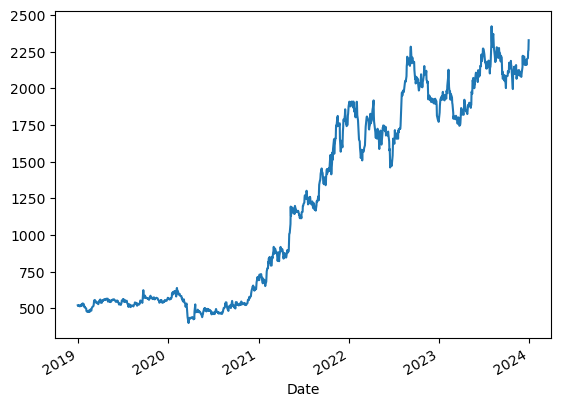

In [7]:
grin['price_t'].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

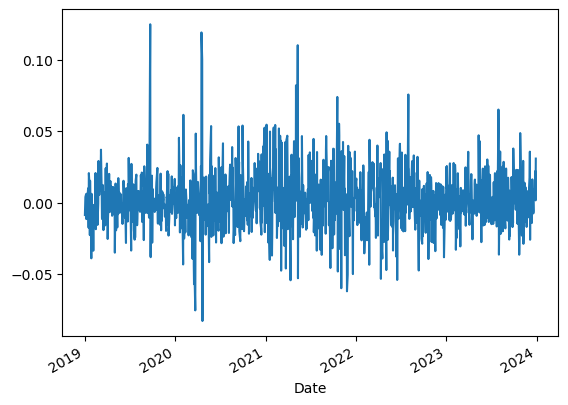

In [8]:
grin['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of Grindwell is in the downtrend in 2019 to 2020  and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [9]:
grin["mov_avg"] = grin["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

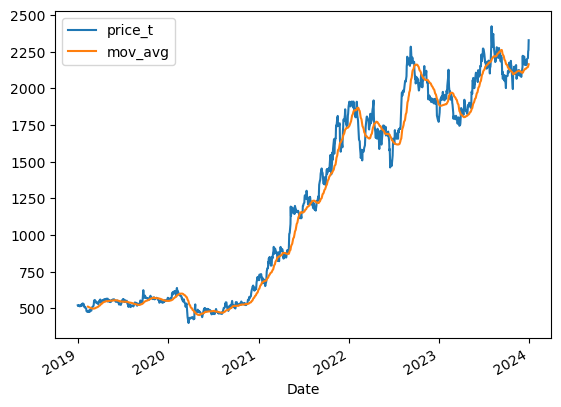

In [10]:
grin[["price_t", "mov_avg"]].plot()

### Volatility measure(30 days)

In [11]:
grin["Log_Ret"] = np.log(grin["price_t"] / grin["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

grin["volatility"] = grin["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

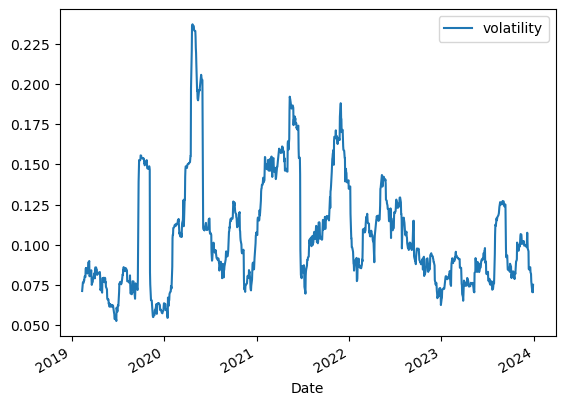

In [12]:
grin[["volatility"]].plot()

### RSI(30 days)

In [13]:
change = grin["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



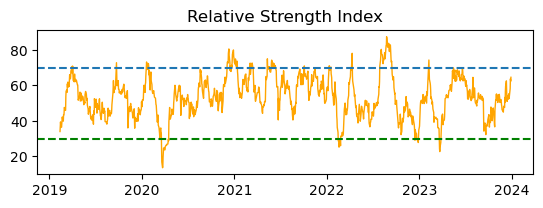

In [14]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

## TEXRAIL.NS

### Download the data

In [15]:
tex = yf.download("TEXRAIL.NS", start="2019-01-01", end="2023-12-30")
tex.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,58.732971,59.476429,58.286900,58.881664,57.925037,181416
2019-01-02,58.881664,58.881664,57.593006,58.138210,57.193665,204124
2019-01-03,58.435593,58.435593,56.353916,56.502605,55.584633,195195
2019-01-04,56.552170,57.394753,56.155663,56.849552,55.925941,154809
2019-01-07,57.246063,57.741699,56.502605,56.948681,56.023460,104470


### Cleaning Process

In [16]:
tex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [17]:
tex.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,50.177263,51.460754,48.925741,50.037749,49.772468,1.874784e+06
std,30.411003,31.221935,29.665033,30.413606,30.410615,2.991609e+06
min,15.000000,17.350000,13.500000,14.850000,14.712519,0.000000e+00
25%,31.200001,31.975000,30.300000,30.825000,30.702866,3.061450e+05
50%,42.900002,43.950001,41.900002,42.900002,42.615181,8.681160e+05
75%,56.351957,57.394753,55.000000,56.150002,55.562742,2.069194e+06
max,179.949997,188.800003,175.100006,178.449997,178.449997,2.920736e+07


In [18]:
tex.rename(columns={"Adj Close": "price_t"}, inplace=True)
tex.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,58.732971,59.476429,58.286900,58.881664,57.925037,181416
2019-01-02,58.881664,58.881664,57.593006,58.138210,57.193665,204124
2019-01-03,58.435593,58.435593,56.353916,56.502605,55.584633,195195
2019-01-04,56.552170,57.394753,56.155663,56.849552,55.925941,154809
2019-01-07,57.246063,57.741699,56.502605,56.948681,56.023460,104470


### Calculate daily returns

In [19]:
tex['daily_returns']=tex["price_t"].pct_change()
tex

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,58.732971,59.476429,58.286900,58.881664,57.925037,181416,NaN
2019-01-02,58.881664,58.881664,57.593006,58.138210,57.193665,204124,-0.012626
2019-01-03,58.435593,58.435593,56.353916,56.502605,55.584633,195195,-0.028133
2019-01-04,56.552170,57.394753,56.155663,56.849552,55.925941,154809,0.006140
2019-01-07,57.246063,57.741699,56.502605,56.948681,56.023460,104470,0.001744
...,...,...,...,...,...,...,...
2023-12-22,171.300003,174.350006,168.649994,173.050003,173.050003,2549578,0.019140
2023-12-26,174.449997,179.000000,174.149994,176.949997,176.949997,2330567,0.022537
2023-12-27,177.649994,179.000000,170.550003,173.649994,173.649994,1639719,-0.018649


### Visualize the trend of stock price

<Axes: xlabel='Date'>

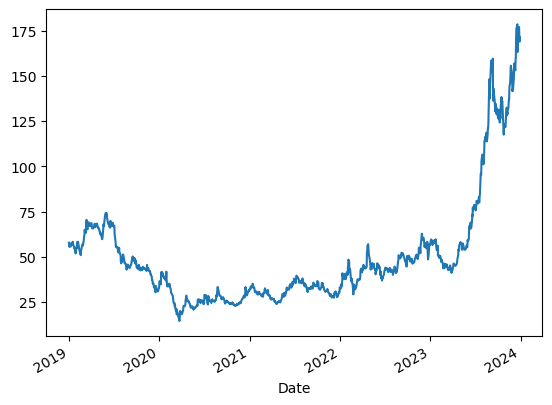

In [20]:
tex['price_t'].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

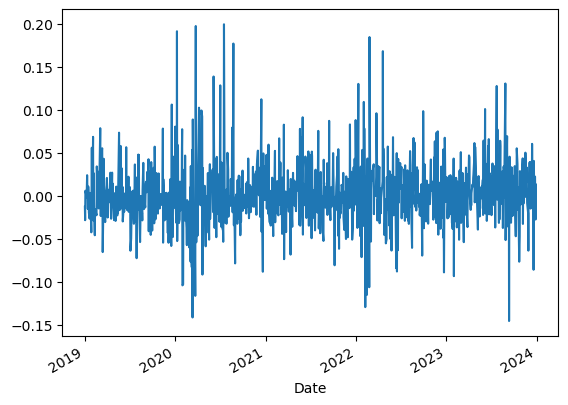

In [21]:
tex['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of Texrail is in the downtrend in early 2019 to 2021 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [22]:
tex["mov_avg"] = tex["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

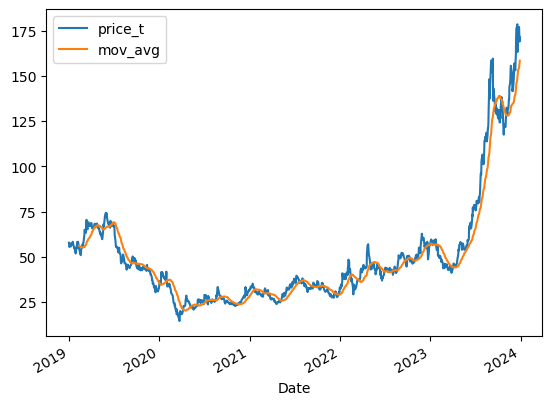

In [23]:
tex[["price_t", "mov_avg"]].plot()

### Volatility measure(30 days)

In [24]:
tex["Log_Ret"] = np.log(tex["price_t"] / tex["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

tex["volatility"] = tex["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

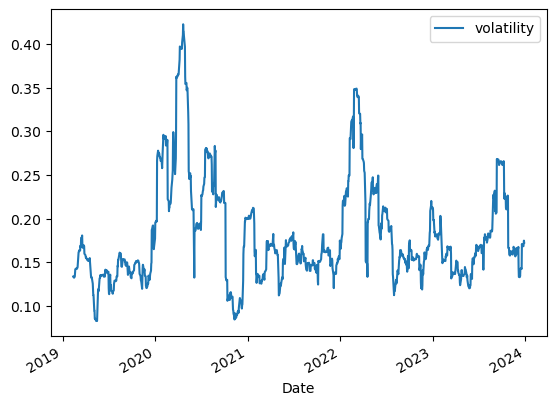

In [25]:
tex[["volatility"]].plot()

### RSI(30 days)

In [26]:
change = tex["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



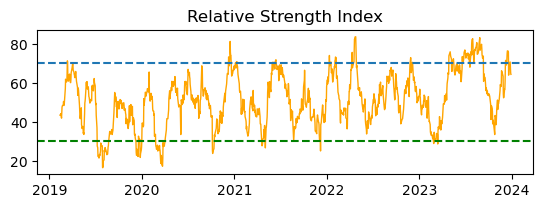

In [27]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

# TITAGARH.NS

### Download the data

In [28]:
tita = yf.download("TITAGARH.NS", start="2022-05-24", end="2023-12-30")
tita.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-24,105.650002,105.849998,101.800003,102.349998,102.284660,231214
2022-05-25,113.000000,116.300003,100.300003,101.900002,101.834953,4270409
2022-05-26,104.050003,104.750000,100.300003,102.550003,102.484535,683438
2022-05-27,103.199997,104.000000,101.199997,102.150002,102.084793,324538
2022-05-30,103.150002,104.349998,102.199997,102.699997,102.634438,268795


### Cleaning process

In [29]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 398 entries, 2022-05-24 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       398 non-null    float64
 1   High       398 non-null    float64
 2   Low        398 non-null    float64
 3   Close      398 non-null    float64
 4   Adj Close  398 non-null    float64
 5   Volume     398 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.8 KB


In [30]:
tita.describe()

,Open,High,Low,Close,Adj Close,Volume
count,398.000000,398.000000,398.000000,398.000000,398.000000,3.980000e+02
mean,389.032538,399.059171,380.184421,389.255401,389.099965,1.155216e+06
std,288.384769,295.744308,281.655995,288.078133,288.057839,1.292167e+06
min,94.500000,96.550003,93.400002,93.900002,93.840057,0.000000e+00
25%,160.899994,164.637501,157.562504,161.475006,161.371929,4.179840e+05
50%,237.299995,241.549995,228.199997,238.075005,237.923019,7.870020e+05
75%,654.512497,674.837509,641.387482,653.250000,652.833008,1.421689e+06
max,1070.000000,1090.949951,1042.000000,1065.800049,1065.800049,1.478581e+07


In [31]:
tita.rename(columns={"Adj Close": "price_t"}, inplace=True)
tita.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2022-05-24,105.650002,105.849998,101.800003,102.349998,102.284660,231214
2022-05-25,113.000000,116.300003,100.300003,101.900002,101.834953,4270409
2022-05-26,104.050003,104.750000,100.300003,102.550003,102.484535,683438
2022-05-27,103.199997,104.000000,101.199997,102.150002,102.084793,324538
2022-05-30,103.150002,104.349998,102.199997,102.699997,102.634438,268795


### Calculate daily returns

In [32]:
tita['daily_returns']=tita["price_t"].pct_change()
tita

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2022-05-24,105.650002,105.849998,101.800003,102.349998,102.284660,231214,NaN
2022-05-25,113.000000,116.300003,100.300003,101.900002,101.834953,4270409,-0.004397
2022-05-26,104.050003,104.750000,100.300003,102.550003,102.484535,683438,0.006379
2022-05-27,103.199997,104.000000,101.199997,102.150002,102.084793,324538,-0.003901
2022-05-30,103.150002,104.349998,102.199997,102.699997,102.634438,268795,0.005384
...,...,...,...,...,...,...,...
2023-12-22,1050.699951,1058.699951,1021.000000,1047.849976,1047.849976,938390,0.001769
2023-12-26,1051.250000,1059.900024,1035.150024,1038.900024,1038.900024,570608,-0.008541
2023-12-27,1045.599976,1046.300049,1021.049988,1036.349976,1036.349976,599676,-0.002455


### Visualize the trend of stock price

<Axes: xlabel='Date'>

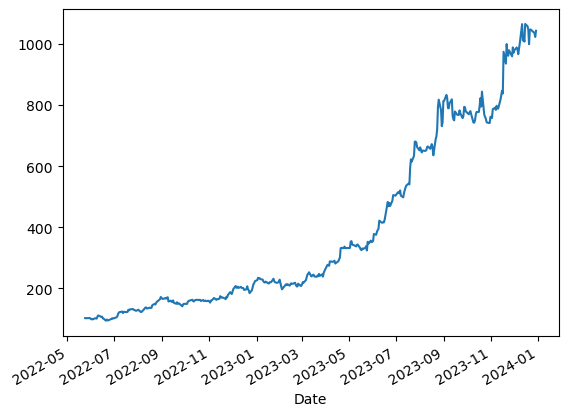

In [33]:
tita["price_t"].plot()

<Axes: xlabel='Date'>

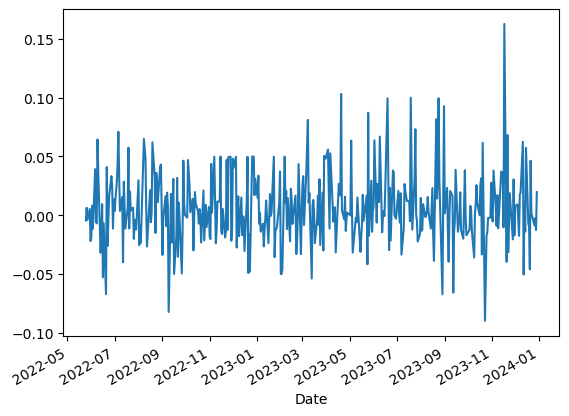

In [34]:
tita['daily_returns'].plot()

### Moving Average 30 days

In [35]:
tita["mov_avg"] = tita["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

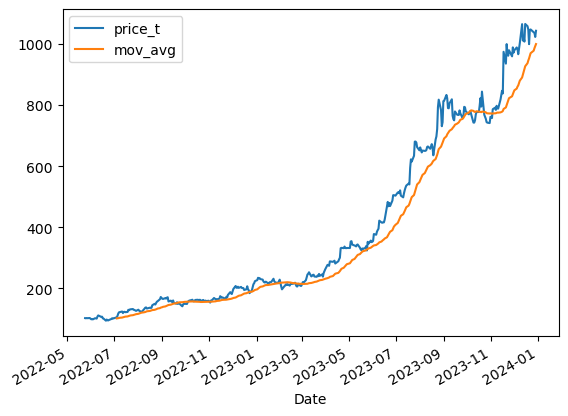

In [36]:
tita[["price_t", "mov_avg"]].plot()

### Volatility measure(30 days)

In [37]:
tita["Log_Ret"] = np.log(tex["price_t"] / tita["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

tita["volatility"] = tita["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

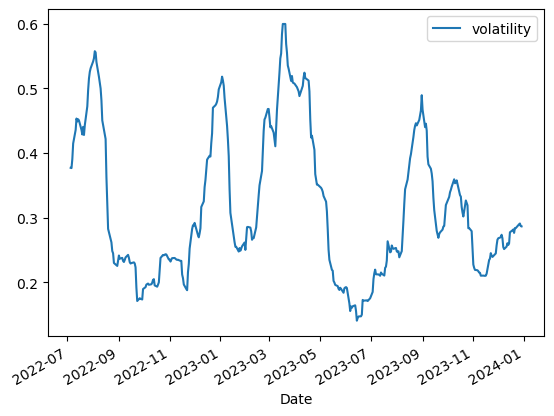

In [38]:
tita[["volatility"]].plot()

### RSI (30 days)

In [39]:
change = tita["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



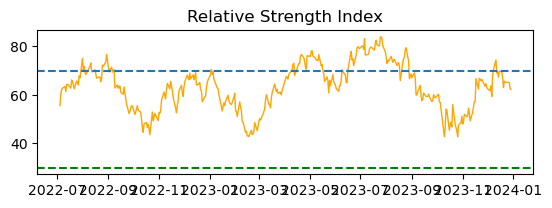

In [40]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

# WENDT.NS

###  Download thee data

In [41]:
wen = yf.download("WENDT.NS", start="2019-01-01", end="2023-12-30")
wen.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3016.500000,3160.000000,3016.500000,3140.000000,2970.171875,123
2019-01-02,3150.000000,3158.949951,3071.500000,3113.800049,2945.389160,104
2019-01-03,3100.000000,3151.000000,3070.300049,3105.300049,2937.349365,122
2019-01-04,3080.050049,3174.000000,3080.000000,3100.600098,2932.903076,195
2019-01-07,3140.000000,3174.000000,3101.100098,3144.399902,2974.334229,150


In [42]:
wen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [43]:
wen.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,5452.914389,5548.721238,5352.742618,5444.442220,5351.692760,1231.551864
std,3411.826181,3463.790137,3355.552183,3408.229279,3442.267240,3731.438563
min,1690.000000,1729.000000,1611.000000,1703.349976,1628.836670,14.000000
25%,2928.012512,2989.875061,2861.362427,2926.187500,2795.133179,239.000000
50%,4095.000000,4268.524902,3988.974976,4093.824951,3982.872803,438.500000
75%,7866.487549,7960.599976,7739.250000,7877.600098,7784.835938,849.000000
max,15555.000000,15990.000000,15010.000000,15313.700195,15313.700195,59538.000000


In [44]:
wen.rename(columns={"Adj Close": "price_t"}, inplace=True)
wen.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,3016.500000,3160.000000,3016.500000,3140.000000,2970.171875,123
2019-01-02,3150.000000,3158.949951,3071.500000,3113.800049,2945.389160,104
2019-01-03,3100.000000,3151.000000,3070.300049,3105.300049,2937.349365,122
2019-01-04,3080.050049,3174.000000,3080.000000,3100.600098,2932.903076,195
2019-01-07,3140.000000,3174.000000,3101.100098,3144.399902,2974.334229,150


### Calculate daily reeturns

In [45]:
wen['daily_returns']=wen["price_t"].pct_change()
wen

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,3016.500000,3160.000000,3016.500000,3140.000000,2970.171875,123,NaN
2019-01-02,3150.000000,3158.949951,3071.500000,3113.800049,2945.389160,104,-0.008344
2019-01-03,3100.000000,3151.000000,3070.300049,3105.300049,2937.349365,122,-0.002730
2019-01-04,3080.050049,3174.000000,3080.000000,3100.600098,2932.903076,195,-0.001514
2019-01-07,3140.000000,3174.000000,3101.100098,3144.399902,2974.334229,150,0.014126
...,...,...,...,...,...,...,...
2023-12-22,13794.450195,13952.049805,13794.450195,13921.099609,13921.099609,465,-0.000176
2023-12-26,13921.900391,14640.000000,13910.200195,14352.099609,14352.099609,973,0.030960
2023-12-27,14499.900391,14499.900391,14030.000000,14083.700195,14083.700195,399,-0.018701


### Visualize the trend of stock price

<Axes: xlabel='Date'>

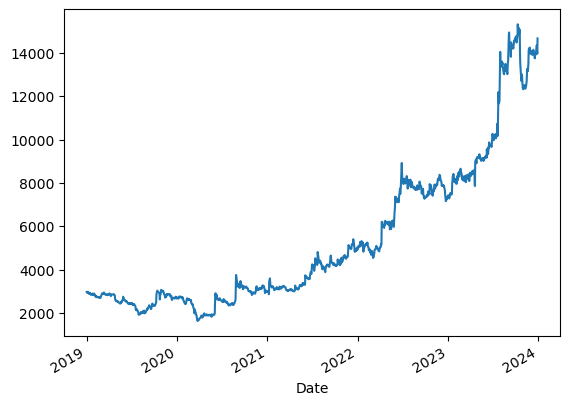

In [46]:
wen["price_t"].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

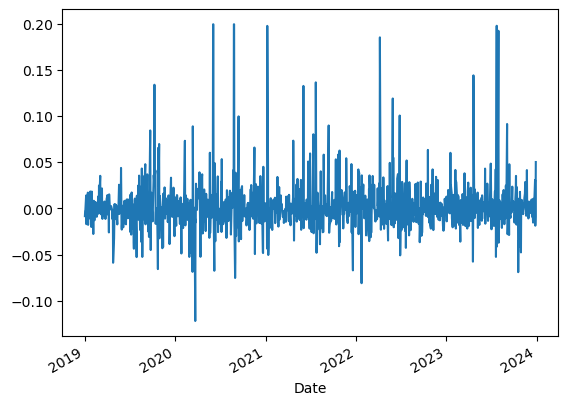

In [47]:
wen['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of wendt is in the downtrend to 2019 to 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [48]:
wen["mov_avg"] = wen["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

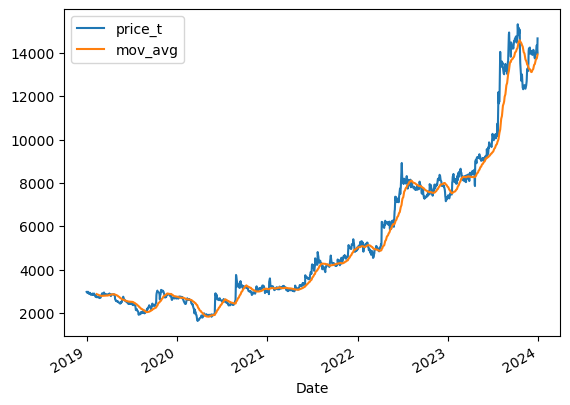

In [49]:
wen[["price_t", "mov_avg"]].plot()

In [50]:
wen["Log_Ret"] = np.log(wen["price_t"] / wen["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

wen["volatility"] = wen["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

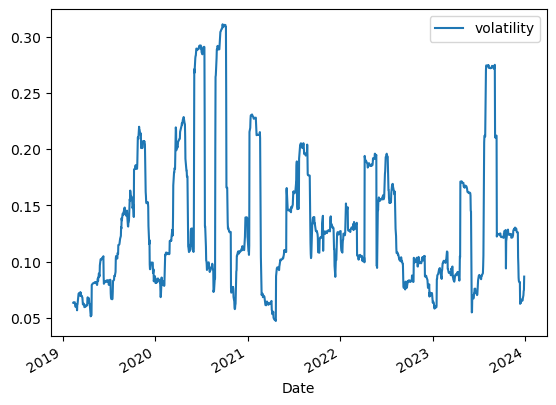

In [51]:
wen[["volatility"]].plot()

#### RSI (30-day)


In [52]:
change = wen["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



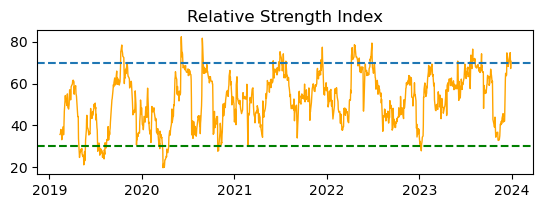

In [53]:


# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color ="green")
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5,)

### Correlation matrix between stocks and Indices

In [54]:
## Correlation Matrix Between Stocks and Indices.

tkr = ['GRINDWELL.NS','TEXRAIL.NS','TITAGARH.NS','WENDT.NS', "^NSEI",'^NSEBANK']
manu = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')



[*********************100%%**********************]  6 of 6 completed


In [55]:
close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = manu[i]['Adj Close']



### compute the correlation matrix

In [56]:
corr_matrix = close_prices.corr()
corr_matrix

### create a heatmap of the correlation matrix using Seaborn

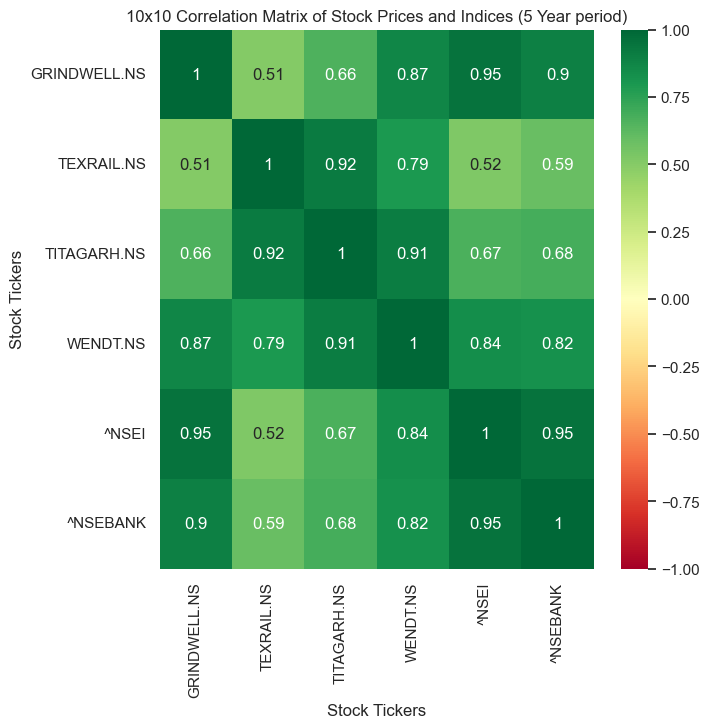

In [57]:
import seaborn as sns
sns.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

### Sector-wise Analysis

In [58]:
# Define a list of stock tickers representing each sector
tickers = ['GRINDWELL.NS', 'TEXRAIL.NS', 'TITAGARH.NS','WENDT.NS']

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each stocks
data = get_stock_data(tickers)

# Check the retrieved data
print("Data:")
print(data.head())

# Continue with the rest of the analysis...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data:
            GRINDWELL.NS  TEXRAIL.NS  TITAGARH.NS     WENDT.NS
Date                                                          
2019-01-01    520.957153   57.925037    81.304939  2970.171875
2019-01-02    516.392578   57.193665    80.114388  2945.389160
2019-01-03    516.066528   55.584633    78.477371  2937.349365
2019-01-04    518.069275   55.925941    78.824615  2932.903076
2019-01-07    521.189941   56.023460    78.824615  2974.334229


In [59]:
# Define a list of stock tickers representing each sector
tickers = ['GRINDWELL.NS', 'TEXRAIL.NS', 'TITAGARH.NS','WENDT.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: TITAGARH.NS, Laggard: TEXRAIL.NS


### Time Series Analysis

### Trend Analysis

### GRINDWELL

[*********************100%%**********************]  1 of 1 completed


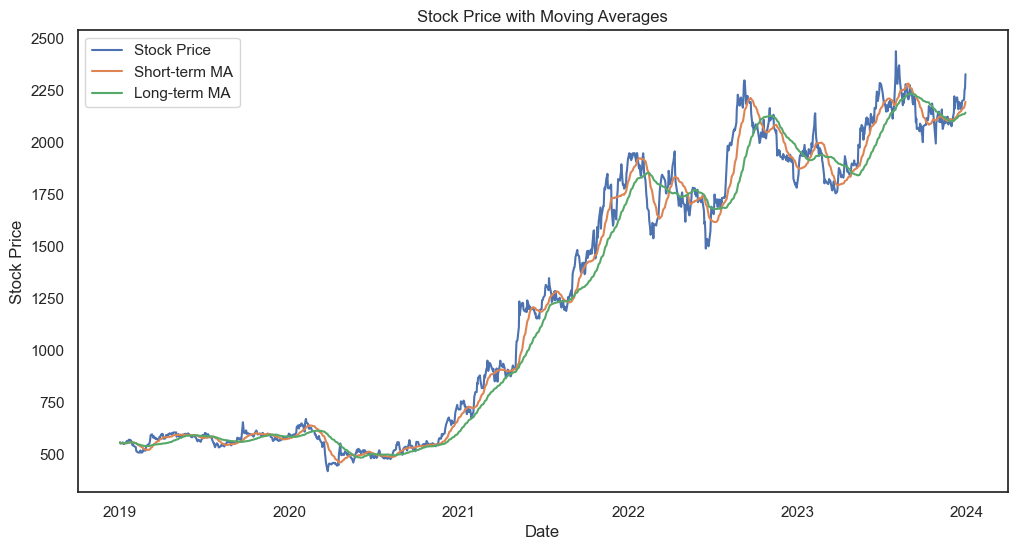

In [60]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    # Define the stock symbol and date range
ticker_symbol = 'GRINDWELL.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### TEXRAIL

[*********************100%%**********************]  1 of 1 completed


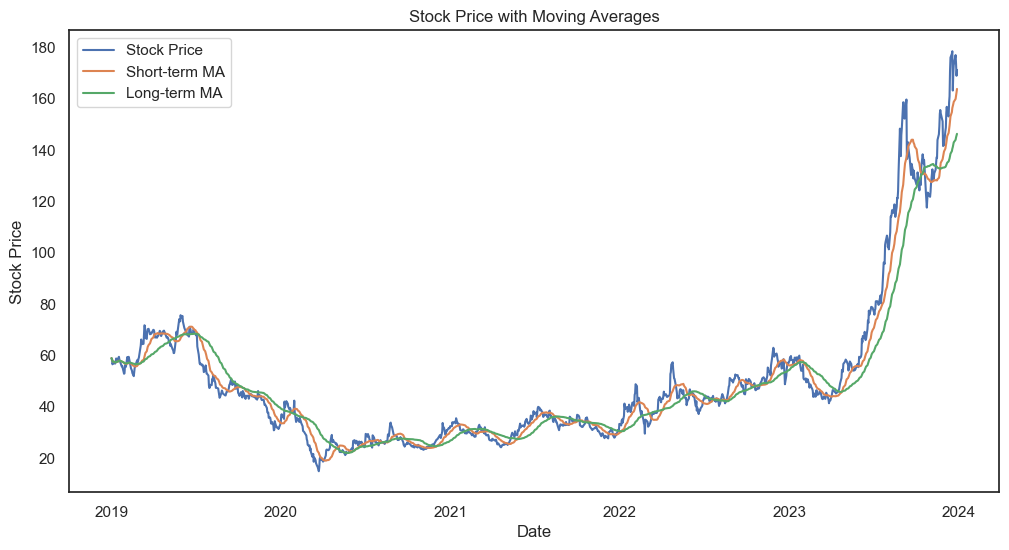

In [61]:
# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    # Define the stock symbol and date range
ticker_symbol = 'TEXRAIL.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### TITAGARH

[*********************100%%**********************]  1 of 1 completed


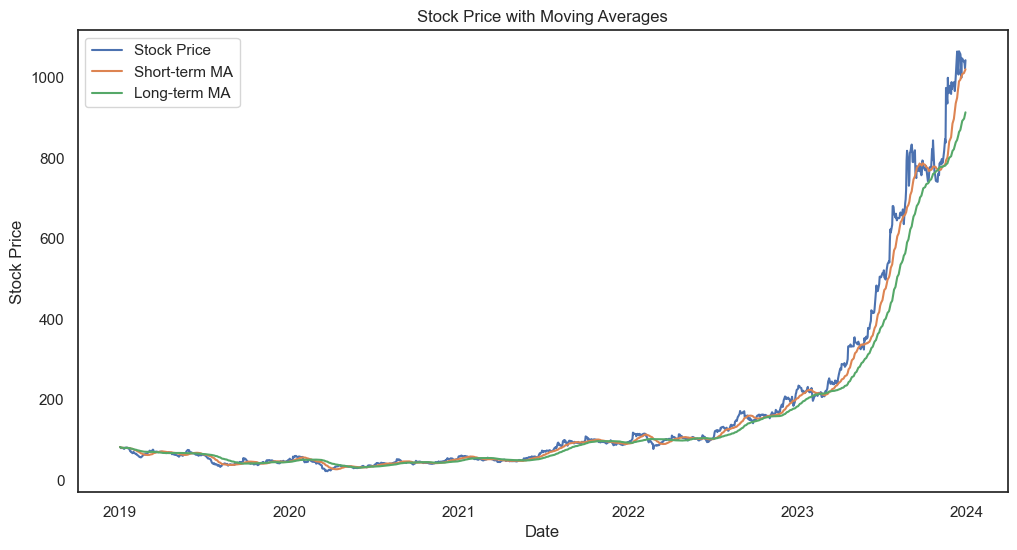

In [62]:
# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    # Define the stock symbol and date range
ticker_symbol = 'TITAGARH.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### WENDT

[*********************100%%**********************]  1 of 1 completed


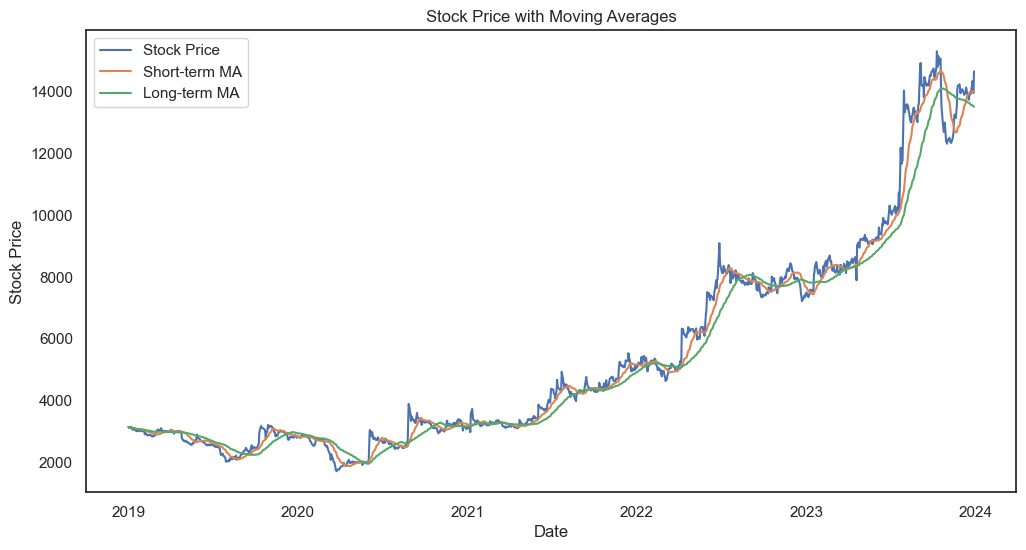

In [63]:
# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
    
    # Define the stock symbol and date range
ticker_symbol = 'WENDT.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  2 of 2 completed


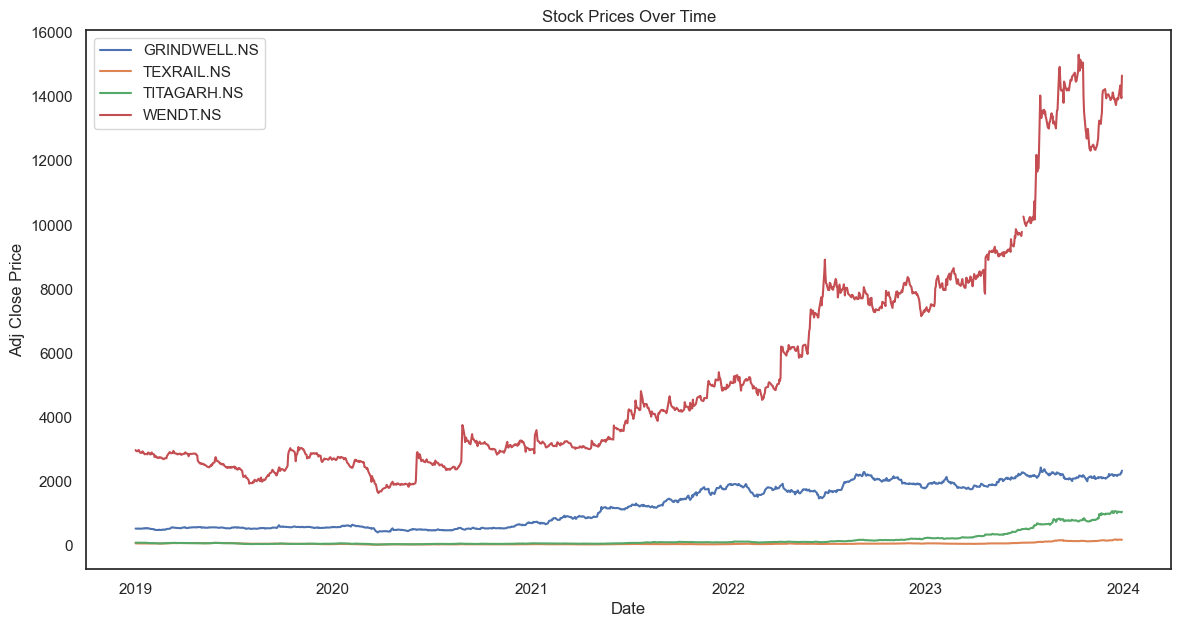

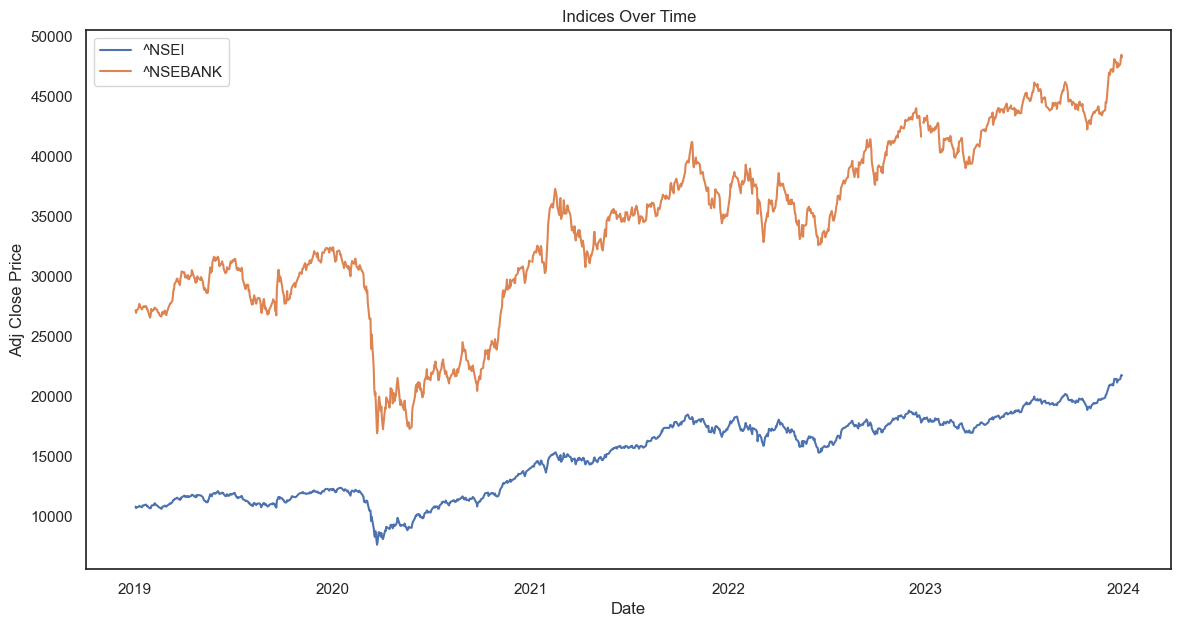

In [64]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['GRINDWELL.NS', 'TEXRAIL.NS', 'TITAGARH.NS','WENDT.NS']  # Example stock symbols
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()
 # Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

#### Volatility Analysis

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


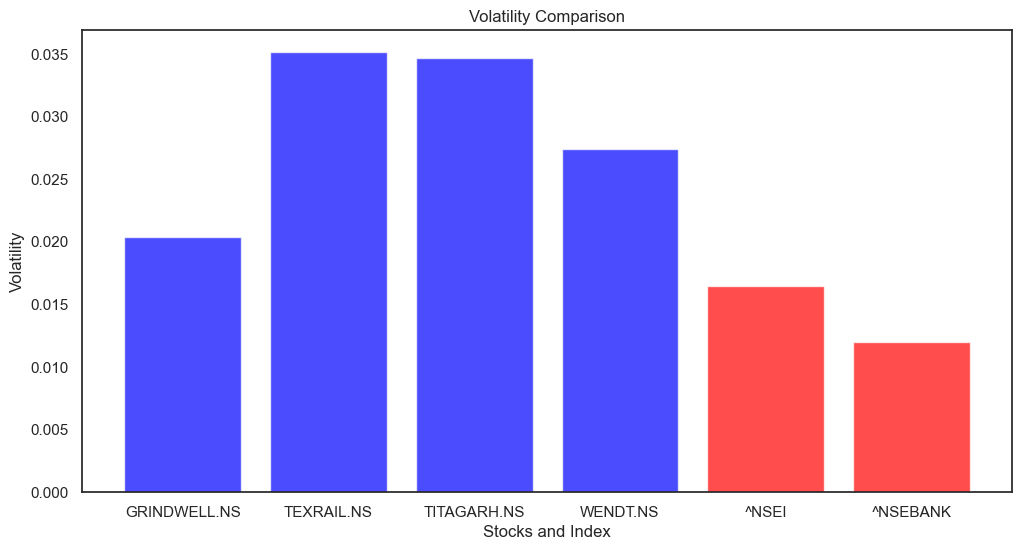

Stock Volatilities:
GRINDWELL.NS    0.020373
TEXRAIL.NS      0.035141
TITAGARH.NS     0.034716
WENDT.NS        0.027431
dtype: float64

Index Volatility:
^NSEBANK    0.016501
^NSEI       0.012040
dtype: float64


In [65]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['GRINDWELL.NS', 'TEXRAIL.NS', 'TITAGARH.NS','WENDT.NS']
index_ticker = '^NSEI','^NSEBANK'  

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)

### Seasonal Patterns

### GRINDWELL

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-01-01  559.849976  565.450012  555.799988  559.250000  520.957153   10666
2019-01-02  558.650024  558.700012  552.950012  554.349976  516.392578    6398
2019-01-03  559.799988  559.849976  552.950012  554.000000  516.066528    2439
2019-01-04  555.150024  569.000000  541.200012  556.150024  518.069275   13774
2019-01-07  564.450012  564.450012  555.000000  559.500000  521.189941    6919


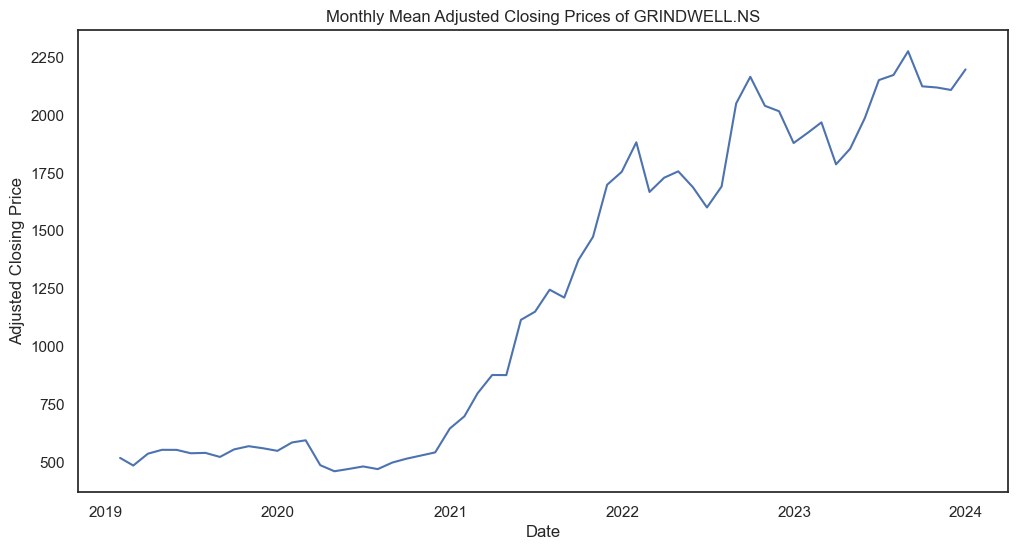

In [66]:
# Define the stock symbol and the time period
stock_symbol = "GRINDWELL.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### TEXRAIL

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-01  58.732971  59.476429  58.286900  58.881664  57.925037  181416
2019-01-02  58.881664  58.881664  57.593006  58.138210  57.193665  204124
2019-01-03  58.435593  58.435593  56.353916  56.502605  55.584633  195195
2019-01-04  56.552170  57.394753  56.155663  56.849552  55.925941  154809
2019-01-07  57.246063  57.741699  56.502605  56.948681  56.023460  104470


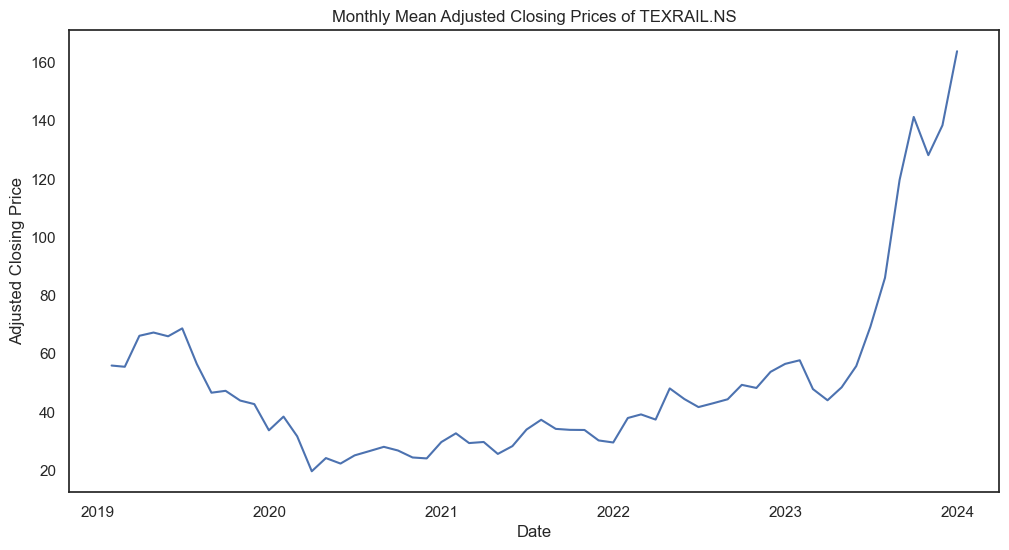

In [67]:
# Define the stock symbol and the time period
stock_symbol = "TEXRAIL.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### TITAGARH

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2019-01-01  81.750000  82.849998  80.849998  81.949997  81.304939  278615
2019-01-02  81.849998  82.599998  80.250000  80.750000  80.114388  345918
2019-01-03  80.500000  81.500000  78.400002  79.099998  78.477371  312893
2019-01-04  79.000000  79.949997  78.099998  79.449997  78.824615  230180
2019-01-07  80.449997  80.949997  79.000000  79.449997  78.824615  205612


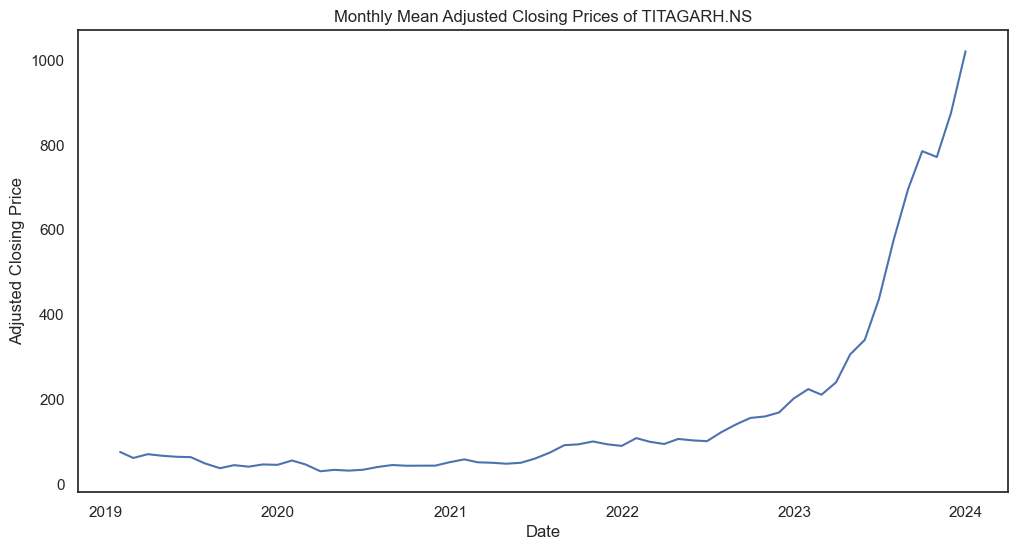

In [68]:
# Define the stock symbol and the time period
stock_symbol = "TITAGARH.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### WENDT

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  3016.500000  3160.000000  3016.500000  3140.000000  2970.171875   
2019-01-02  3150.000000  3158.949951  3071.500000  3113.800049  2945.389160   
2019-01-03  3100.000000  3151.000000  3070.300049  3105.300049  2937.349365   
2019-01-04  3080.050049  3174.000000  3080.000000  3100.600098  2932.903076   
2019-01-07  3140.000000  3174.000000  3101.100098  3144.399902  2974.334229   

            Volume  
Date                
2019-01-01     123  
2019-01-02     104  
2019-01-03     122  
2019-01-04     195  
2019-01-07     150  


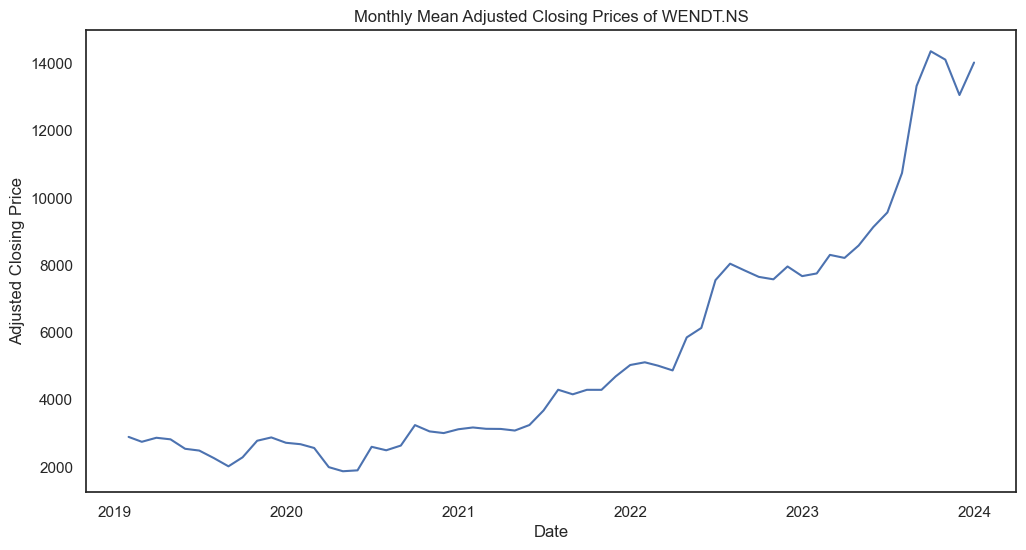

In [69]:
# Define the stock symbol and the time period
stock_symbol = "WENDT.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### Fundamental Analysis

In [70]:
# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(stock_data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(stock_tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)

Financial Ratios:
              Return on Equity (ROE)  Return on Assets (ROA)  \
GRINDWELL.NS                     NaN                0.000338   
TEXRAIL.NS                       NaN                0.008377   
TITAGARH.NS                      NaN                0.002496   
WENDT.NS                         NaN                0.000078   

              Debt to Equity Ratio  
GRINDWELL.NS             -6.466622  
TEXRAIL.NS             -103.268556  
TITAGARH.NS             -12.151983  
WENDT.NS                 -1.042500  


In [71]:
# List of stock tickers for the companies you want to analyze
sector_tickers = {'Logistics':  ['BLUEDART.NS', 'CONCOR.NS', 'DELHIVERY.NS','GESHIP.NS','TVSSCS.NS'], 'Manufacturing': ['GRINDWELL.NS', 'TEXRAIL.NS', 'TITAGARH.NS','WENDT.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios
# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison
    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(stock_tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)

Comparison of Ratios:
           GRINDWELL.NS  TEXRAIL.NS  TITAGARH.NS    WENDT.NS  Logistics  \
Open           0.448646    0.448646     0.448646    0.448646  -0.167790   
High           0.451798    0.451798     0.451798    0.451798  -0.215131   
Low            0.402425    0.402425     0.402425    0.402425  -0.178818   
Close          0.405653    0.405653     0.405653    0.405653  -0.193249   
Adj Close      0.416923    0.416923     0.416923    0.416923  -0.194333   
Volume       215.773189  215.773189   215.773189  215.773189  71.628979   

           Manufacturing  
Open           -0.167790  
High           -0.215131  
Low            -0.178818  
Close          -0.193249  
Adj Close      -0.194333  
Volume         71.628979  
